결과 데이터가 0과 1로 구성되어 있다.<br>
2진 분류<br>
손실함수 : binary_crossentropy<br>
출력층의 활성화 함수 : sigmoid<br>
출력층의 노드의 개수 : 1<br>

In [37]:
# 그래프 한글 표시 
# 나눔 폰트 설치 후 
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 런타임 다시 시작 후 진행하기

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 12 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 폰트 설정
# plt.rc('font', family='폰트이름') 
plt.rc('font', family='NanumBarunGothic') 

In [2]:
df = pd.read_csv('/content/drive/MyDrive/부산대 AI/12W_딥러닝/data/pima-indians-diabetes.csv', header=None)
df.columns = ['임신횟수', '혈당', '혈압', '근육피부두께', '인슐린',
               '체질량', '가족력', '나이', '당뇨여부']
df.head()

,임신횟수,혈당,혈압,근육피부두께,인슐린,체질량,가족력,나이,당뇨여부
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df['당뇨여부'].value_counts() # 정상(0) : 500명 / 당뇨병환자(1) : 268명

0    500
1    268
Name: 당뇨여부, dtype: int64

In [4]:
# 정보별 특징
df.describe()

,임신횟수,혈당,혈압,근육피부두께,인슐린,체질량,가족력,나이,당뇨여부
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# 상관관계
df.corr()

,임신횟수,혈당,혈압,근육피부두께,인슐린,체질량,가족력,나이,당뇨여부
임신횟수,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
혈당,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
혈압,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
근육피부두께,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
인슐린,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
체질량,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
가족력,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
나이,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
당뇨여부,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


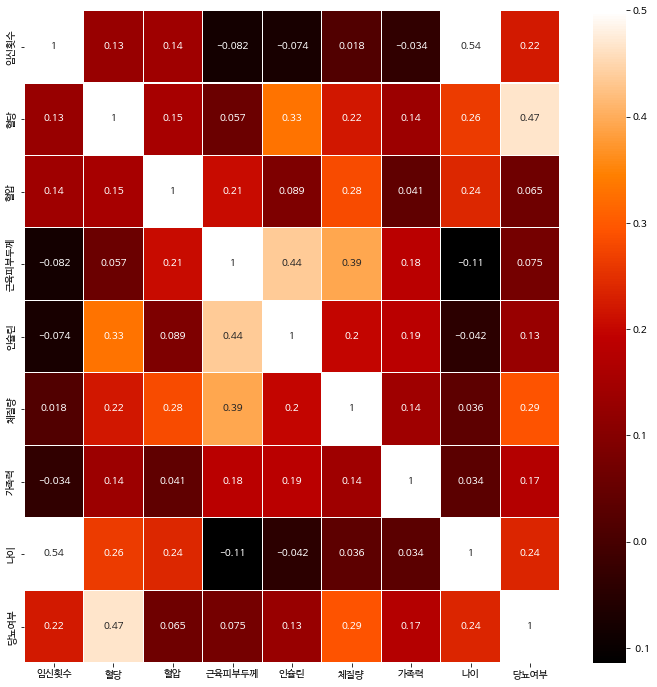

In [8]:
# 맷플롯립을 이용해 상관관계 그래프로 표현

# 그래프 색상 구성
colormap = plt.cm.gist_heat

#그래프 크기
plt.figure(figsize=(12,12))

# seaborn heatmap()을 사용하여 그래프 표시

# 전혀 다른 패턴으로 변화하면 0
# 서로 비슷한 패턴으로 변하면 1에 가까운 값을 출력

sns.heatmap(df.corr(), linewidths=0.1, vmax=0.5, cmap=colormap, linecolor='white', annot=True);
plt.show()



---



In [9]:
# 딥러닝 라이브러리
import tensorflow as tf
# 신경망 모델을 관리하는 객체
from tensorflow.keras.models import Sequential
# 선형 회귀 레이어
from tensorflow.keras.layers import Dense
# 활성화 함수를 정의하는 객체
from tensorflow.keras.layers import Activation

In [10]:
df

,임신횟수,혈당,혈압,근육피부두께,인슐린,체질량,가족력,나이,당뇨여부
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [11]:
X = df.drop('당뇨여부', axis=1)
y = df['당뇨여부']

display(X)
display(y)

,임신횟수,혈당,혈압,근육피부두께,인슐린,체질량,가족력,나이
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: 당뇨여부, Length: 768, dtype: int64

In [12]:
# 전반적인 정보를 확인 / 문자열 데이터가 있으면 숫자로 변경해야함
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   임신횟수    768 non-null    int64  
 1   혈당      768 non-null    int64  
 2   혈압      768 non-null    int64  
 3   근육피부두께  768 non-null    int64  
 4   인슐린     768 non-null    int64  
 5   체질량     768 non-null    float64
 6   가족력     768 non-null    float64
 7   나이      768 non-null    int64  
 8   당뇨여부    768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


임신횟수      0
혈당        0
혈압        0
근육피부두께    0
인슐린       0
체질량       0
가족력       0
나이        0
당뇨여부      0
dtype: int64

In [13]:
# 이진분류의 옵션

# 출력층의 노드 개수 
out_nodes = 1

# 손실함수
loss_function = 'binary_crossentropy'

# 활성화함수
activation_function = 'sigmoid'

In [14]:
# 표준화
from sklearn.preprocessing import StandardScaler

# 표준화
scaler1 = StandardScaler()
X = scaler1.fit_transform(X)
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [15]:
# 입력노드의 개수 
# 입력 데이터 행 하나의 컬럼의 개수 = input_dim
input_size = X.shape[1]
input_size

8

In [16]:
# 신경망 설계
model = Sequential()

# 은닉층
model.add(Dense(12, input_dim = input_size, name='Dense_1'))

# 활성화 기준 relu
model.add(Activation('relu'))

# 출력층
# model.add(Dense(out_nodes))
# model.add(Activation(activation_function))
model.add(Dense(1, activation='sigmoid', name='Dense_3'))

model.compile(loss=loss_function, optimizer='adam', metrics=['accuracy'])
model.summary()

# 학습
model.fit(X, y, epochs=200, batch_size = 10)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_1 (Dense)             (None, 12)                108       
                                                                 
 activation (Activation)     (None, 12)                0         
                                                                 
 Dense_3 (Dense)             (None, 1)                 13        
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
77/77 [==============================] - 1s 3ms/step - loss: 0.7681 - accuracy: 0.4258
Epoch 2/200
77/77 [==============================] - 0s 3ms/step - loss: 0.6808 - accuracy: 0.6289
Epoch 3/200
77/77 [==============================] - 0s 3ms/step - loss: 0.6236 - accuracy: 0.7070
Epoch 4/200
77/77 [======

In [17]:
# 정확도 확인
a1 = model.evaluate(X , y)
print(f'손실률 : {a1[0]*100}')
print(f'정확도 : {a1[1]*100}')

24/24 [==============================] - 0s 1ms/step - loss: 0.4106 - accuracy: 0.8099
손실률 : 41.056469082832336
정확도 : 80.98958134651184
